# Check distribution of true labels from the embeddings

In [1]:
import numpy as np

file = 'kornum/embeddings/true_labels.npy'
true_labels = np.asarray(np.load(file), dtype=np.int32)
true_labels.shape, np.sum(true_labels, axis=0)

((176700, 4), array([66426, 11363, 98181,   495]))

In [2]:
art_noart = np.array([1 if x[-1] == 1 else 0 for x in true_labels])
art_noart.shape, art_noart.sum()

((176700,), 495)

# 1D-CNN100

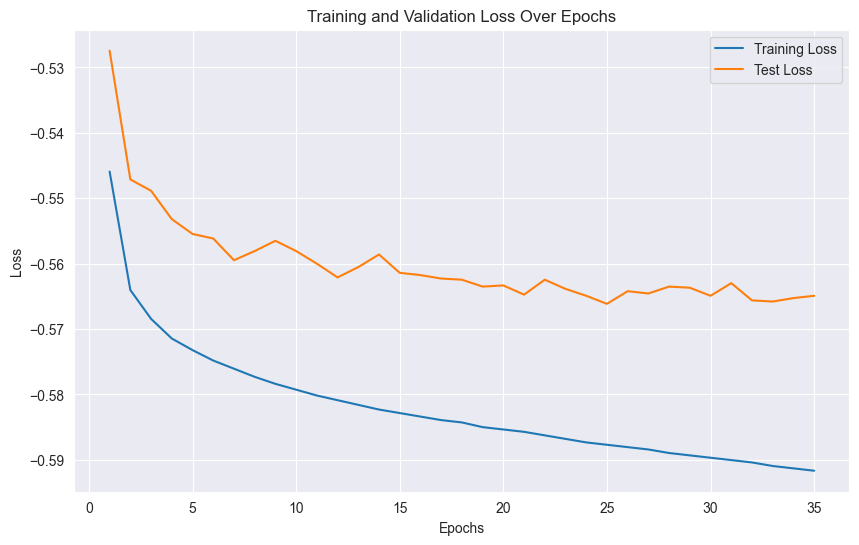

In [12]:
import matplotlib.pyplot as plt
import numpy as np

import re

file = r'C:\Users\lucas\AppData\Roaming\JetBrains\PyCharm2024.1\scratches\training_ta_100_22071589.out'
training_losses = []
validation_losses = []
with open(file, 'r') as f:
    for line in f.readlines():
        matches = re.findall(r"loss: (\d+\.\d+) - val_loss: (\d+\.\d+)", line)
        if matches:
            loss, val_loss = matches[0]
            training_losses.append(float(loss))
            validation_losses.append(float(val_loss))

epochs = np.arange(1, len(training_losses) + 1)

# Plotting the training and test loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_losses, label='Training Loss')
plt.plot(epochs, validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
